In [7]:
# Loading Dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"aloevera",
 shuffle = True,
 image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 3495 files belonging to 3 classes.


In [1]:
pip install nbconvert


Note: you may need to restart the kernel to use updated packages.


In [8]:
#Spliting Function

def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle=True, shuffle_size= 10000):
    assert(train_split+val_split+test_split) == 1
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

train_ds, validation_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
BATCH_SIZE = 32  
IMAGE_SIZE = 256    
channels = 3         
epochs =  50
# Load your trained model
model = tf.keras.models.load_model('D:/aloevera-project/model/3')  # Replace with the path to your saved model

# Load the validation dataset
# You should have a dataset prepared with validation images and labels
# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset to make predictions
for images, labels in validation_dataset:
    predictions = model.predict(images)
    predicted_labels.extend(tf.argmax(predictions, axis=1).numpy())
    true_labels.extend(labels.numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


1/1 [==============================] - 1s 1s/step
Accuracy: 0.9656652360515021
Precision: 0.9678881762765178
Recall: 0.965128124006473
F1-Score: 0.9663853872737302


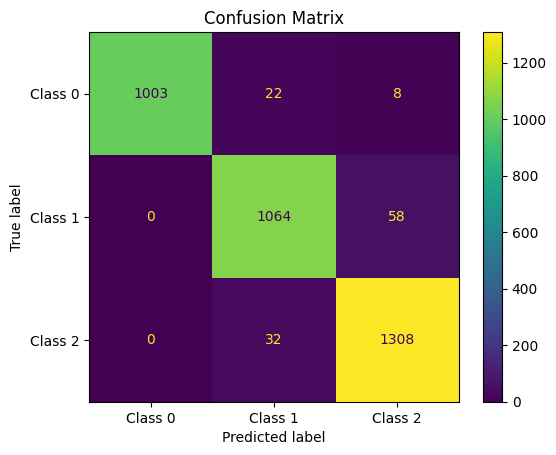

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, auc

# Assuming you already have true_labels and predicted_labels from your model evaluation

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix as a heatmap
class_names = ['Class 0', 'Class 1', 'Class 2']  # Replace with your class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()



In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you already have true_labels and predicted_labels from your model evaluation

# Convert true_labels and predicted_labels to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculate ROC curve for each class
n_classes = len(class_names)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predicted_labels[:, i], average='micro')
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

colors = ['darkorange', 'cornflowerblue', 'green']  # You can add more colors for additional classes

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for {class_names[i]}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

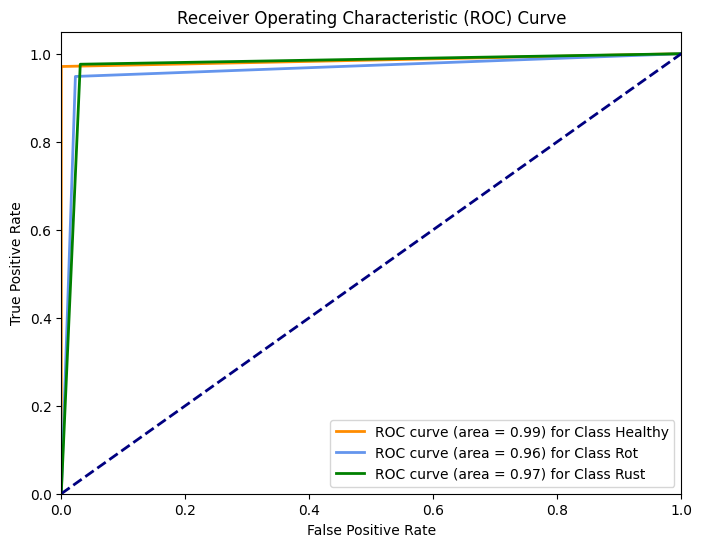

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Convert true_labels and predicted_probabilities to numpy arrays
true_labels = np.array(true_labels)
predicted_probabilities = np.array(predicted_labels)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(true_labels))

for i in range(n_classes):
    true_labels_one_class = (true_labels == i).astype(int)
    predicted_probabilities_one_class = (predicted_probabilities == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(true_labels_one_class, predicted_probabilities_one_class)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
class_names = ['Healthy', 'Rot', 'Rust'] 
colors = ['darkorange', 'cornflowerblue', 'green'] 

for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for Class {class_names[i]}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [39]:
for i in range(n_classes):
    true_labels_one_class = (true_labels == i).astype(int)
    predicted_probabilities_one_class = (predicted_probabilities == i).astype(int)
    print(true_labels_one_class)
    print(predicted_probabilities_one_class)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]


In [37]:
len(np.unique(true_labels))

3

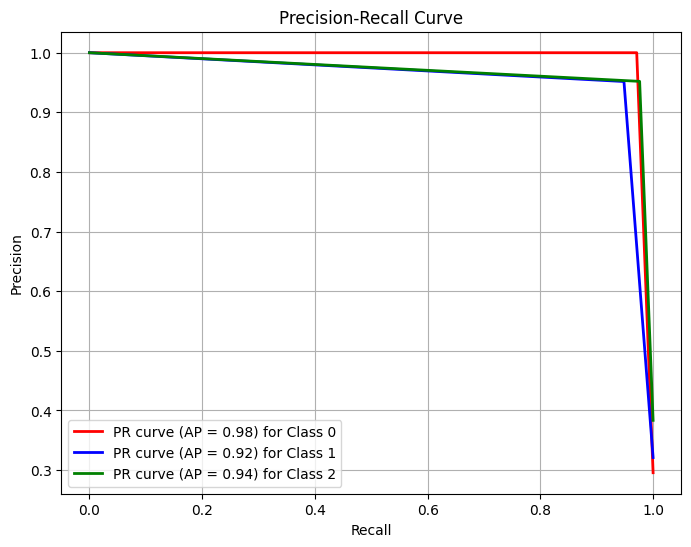

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have true_labels and predicted_probabilities from your model evaluation

# Convert true_labels and predicted_probabilities to numpy arrays
# Convert true_labels and predicted_probabilities to numpy arrays
true_labels = np.array(true_labels)
predicted_probabilities = np.array(predicted_labels)


# Initialize variables to store precision and recall values for each class
precision = {}
recall = {}
average_precision = {}

# Iterate over each class
for i in range(n_classes):  # Replace n_classes with the actual number of classes
    # Calculate precision and recall for the current class
    true_labels_one_class = (true_labels == i).astype(int)
    predicted_probabilities_one_class = (predicted_probabilities == i).astype(int)
    precision[i], recall[i], _ = precision_recall_curve(true_labels_one_class, predicted_probabilities_one_class)
    
    # Calculate the average precision for the current class
    average_precision[i] = average_precision_score(true_labels_one_class, predicted_probabilities_one_class)

# Plot precision-recall curves for each class
plt.figure(figsize=(8, 6))

colors = ['red', 'blue', 'green']  # You can add more colors for additional classes

for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label=f'PR curve (AP = {average_precision[i]:.2f}) for Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
